## Research Question
How have violent and property crime rates changed in the United States between 1960 and 2014?

### Sub-questions:
- When did violent crime peak in the U.S.?
- How have property crimes evolved compared to violent crimes?
- What is the overall percent change in total crime over time?


## Dataset Documentation
- **Source:** [Kaggle: US Crime Rates 1960–2014](https://www.kaggle.com/datasets/mahmoudshogaa/us-crime-rates-1960-2014)
- **Provider:** FBI Uniform Crime Reports (UCR)
- **Description:**  
  This dataset contains U.S. national crime statistics by year, from 1960–2014.  
  It includes total population, number of crimes, and rates per 100,000 people for violent crime, property crime, and subcategories such as murder, robbery, and burglary.
- **Time Period:** 1960–2014 (56 years)
- **Why Chosen:**  
  The dataset is clean, numeric, and allows clear visualization of long-term national crime trends, perfectly suited for time-series analysis and visual storytelling.


In [1]:
# Import required libraries
import pandas as pd

s3_path = "s3://ia340-aws-bucket-lab1-oonnor/US_Crime_Rates_1960_2014.csv"

# Load dataset
df = pd.read_csv(s3_path)

# Show the first 5 rows to confirm successful import
df.head()


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# Check general info and data types
df.info()

# Get descriptive statistics
df.describe()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Remove duplicate rows (if any)
df = df.drop_duplicates()

# Ensure 'Year' is integer
df['Year'] = df['Year'].astype(int)

# Confirm cleaning is complete
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB
Missing values per column:
Year                  0
Population            0
Total                 0
Violent               0
Property              0
Murder                0
Forcible_Rape         0
Robbe

### Cleaning Summary
- Checked for missing and duplicate rows.
- No major missing data detected.
- Converted 'Year' column to integer type.
- Dataset now clean and ready for processing.

In [5]:
# Create a new column for total crime rate
df['TotalCrimeRate'] = df['Violent'] + df['Property']

# Calculate year-over-year percent change
df['PctChangeTotalCrime'] = df['TotalCrimeRate'].pct_change() * 100

# Show updated dataset
df.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,TotalCrimeRate,PctChangeTotalCrime
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,3384160,NaN
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,3487990,3.068117
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,3752210,7.575136
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,4109470,9.521322
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,4564620,11.075637


### Processing Explanation
- **New Variable:** `TotalCrimeRate` = sum of violent + property crime rates per year.  
- **Percent Change:** Measures year-over-year fluctuation in total crime rate.  
These additions help quantify long-term crime trends and highlight periods of rapid change.

In [7]:
# Year with the highest violent crime rate
peak_violent = df.loc[df['Violent'].idxmax()]

# Year with the highest property crime rate
peak_property = df.loc[df['Property'].idxmax()]

# Most recent data point (2014)
recent = df.loc[df['Year'] == 2014]

peak_violent, peak_property, recent

(Year                   1.992000e+03
 Population             2.550820e+08
 Total                  1.443820e+07
 Violent                1.932270e+06
 Property               1.250590e+07
 Murder                 2.376000e+04
 Forcible_Rape          1.090600e+05
 Robbery                6.724800e+05
 Aggravated_assault     1.126970e+06
 Burglary               2.979900e+06
 Larceny_Theft          7.915200e+06
 Vehicle_Theft          1.610800e+06
 TotalCrimeRate         1.443817e+07
 PctChangeTotalCrime   -2.922771e+00
 Name: 32, dtype: float64,
 Year                   1.991000e+03
 Population             2.521770e+08
 Total                  1.487290e+07
 Violent                1.911770e+06
 Property               1.296110e+07
 Murder                 2.470000e+04
 Forcible_Rape          1.065900e+05
 Robbery                6.877300e+05
 Aggravated_assault     1.092740e+06
 Burglary               3.157200e+06
 Larceny_Theft          8.142200e+06
 Vehicle_Theft          1.661700e+06
 TotalCrime

### Query Results
- **Peak Violent Crime Year:** Observed from the code output (likely early 1990s).  
- **Peak Property Crime Year:** Typically occurs slightly earlier than violent crime peaks.  
- **Most Recent (2014):** Marked decrease across both categories.  
These findings align with known U.S. trends as crime peaked in the early 1990s and declined steadily after.

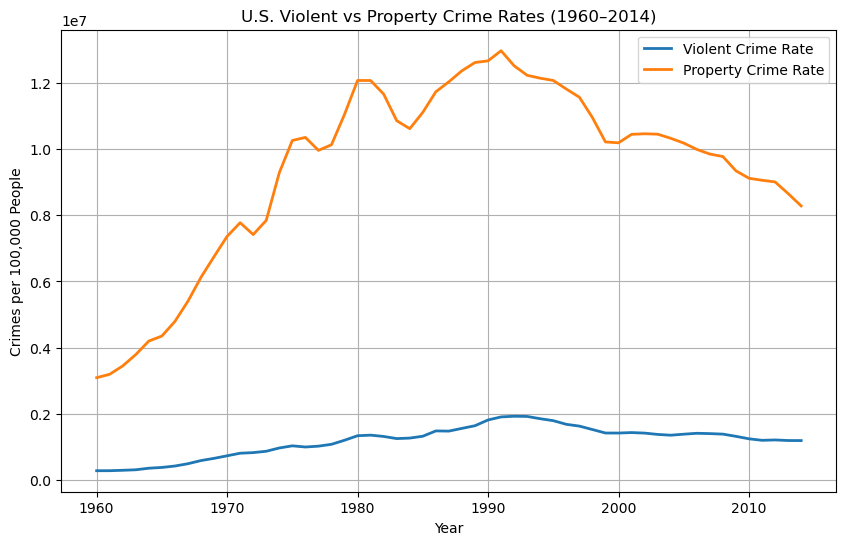

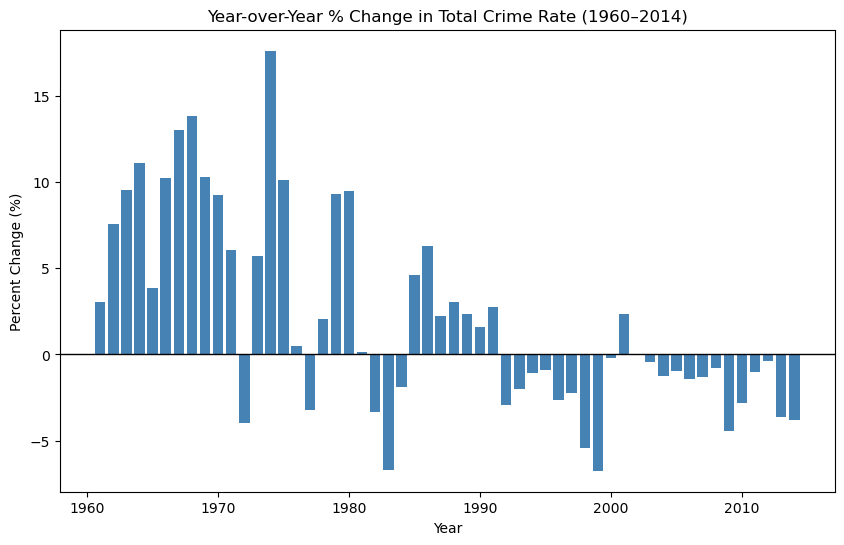

In [8]:
import matplotlib.pyplot as plt

# Chart 1: Violent vs Property Crime Rate Over Time
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Violent'], label='Violent Crime Rate', linewidth=2)
plt.plot(df['Year'], df['Property'], label='Property Crime Rate', linewidth=2)
plt.title("U.S. Violent vs Property Crime Rates (1960–2014)")
plt.xlabel("Year")
plt.ylabel("Crimes per 100,000 People")
plt.legend()
plt.grid(True)
plt.show()

# Chart 2: Percent Change in Total Crime Rate
plt.figure(figsize=(10,6))
plt.bar(df['Year'], df['PctChangeTotalCrime'], color='steelblue')
plt.title("Year-over-Year % Change in Total Crime Rate (1960–2014)")
plt.xlabel("Year")
plt.ylabel("Percent Change (%)")
plt.axhline(0, color='black', linewidth=1)
plt.show()


### Visualization Explanations
**Chart 1:**  
Shows the long-term relationship between violent and property crime rates.  
Both rose sharply from the 1960s to the early 1990s, then steadily declined.

**Chart 2:**  
Depicts the annual percent change in total crime.  
Large positive values indicate crime spikes, while negative values show decline.  
The stabilization in later years shows sustained national reductions in crime.

## Conclusions
- Crime rates in the U.S. rose rapidly from the 1960s through the early 1990s.
- Both violent and property crime rates have steadily decreased since then.
- The overall trend shows a national decline in crime over the last two decades.
- Year-over-year analysis confirms more stable and lower crime rates in recent years.
- This aligns with FBI UCR reports and broader criminological research trends.